#Load the dataset

In [ ]:
import requests, io
import pandas as pd
pd.options.mode.chained_assignment = None

#the csv is stored in a github repo
r = requests.get( "https://github.com/TravellerOnCode/Tales_with_numbers/blob/master/Default_of_Credit_Card_Clients/UCI_Credit_Card.csv?raw=true" ) 
df = pd.read_csv(io.BytesIO(r.content))
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


# Inspect the Dataset

In [ ]:
#Load the libraries
# For visualizations
import matplotlib.pyplot as plt
import re
import string
import math

In [ ]:
print('The dimensions of the dataframe - ROWS: ',df.shape[0],' , COLUMNS: ',df.shape[1])

The dimensions of the dataframe - ROWS:  30000  , COLUMNS:  25


In [ ]:
#the number of null values present in each column
print('The number of NULL values in each column !')
print(df.isnull().sum())

The number of NULL values in each column !
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


Congratulations there is no null values.

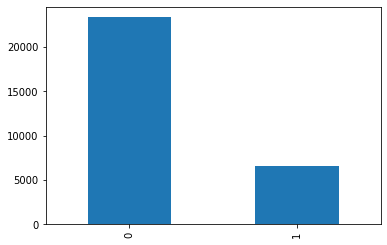

In [ ]:
df['default.payment.next.month'].value_counts().plot(kind='bar')

1 denotes a defaulter and 0 denotes not a defaulter. The dataset has data imbalance

#Test/Train Valid

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#extract the feature set and the labels
data_X = df.drop('default.payment.next.month',axis=1)
data_Y = df['default.payment.next.month']

# split data into training and validation set
train_X, test_X = train_test_split(data_X, test_size = 0.2, random_state = 42)
train_Y, test_Y = train_test_split(data_Y, test_size = 0.2, random_state = 42)

In [ ]:
# split data into training and validation set
train_X, test_X = train_test_split(data_X, test_size = 0.2, random_state = 42)
train_Y, test_Y = train_test_split(data_Y, test_size = 0.2, random_state = 42)

In [ ]:
test_X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,2309,30000.0,1,2,2,25,0,0,0,0,0,0,8864.0,10062.0,11581.0,12580.0,13716.0,14828.0,1500.0,2000.0,1500.0,1500.0,1500.0,2000.0
22404,22405,150000.0,2,1,2,26,0,0,0,0,0,0,136736.0,125651.0,116684.0,101581.0,77741.0,77264.0,4486.0,4235.0,3161.0,2647.0,2669.0,2669.0
23397,23398,70000.0,2,3,1,32,0,0,0,0,0,0,70122.0,69080.0,68530.0,69753.0,70111.0,70212.0,2431.0,3112.0,3000.0,2438.0,2500.0,2554.0
25058,25059,130000.0,1,3,2,49,0,0,0,0,0,-1,20678.0,18956.0,16172.0,16898.0,11236.0,6944.0,1610.0,1808.0,7014.0,27.0,7011.0,4408.0
2664,2665,50000.0,2,2,2,36,0,0,0,0,0,2,94228.0,47635.0,42361.0,19574.0,20295.0,19439.0,2000.0,1500.0,1000.0,1800.0,0.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,2211,360000.0,2,1,2,27,1,-2,-1,-1,-1,-1,0.0,0.0,830.0,0.0,1271.0,179.0,0.0,830.0,0.0,1271.0,179.0,1970.0
14144,14145,500000.0,2,1,2,28,2,0,0,2,0,0,98541.0,102052.0,111690.0,78070.0,78376.0,80912.0,6000.0,13151.0,0.0,3000.0,5000.0,10000.0
23108,23109,60000.0,2,1,1,28,0,0,0,0,0,2,46233.0,47263.0,48696.0,50385.0,52045.0,52661.0,2100.0,2500.0,2500.0,2500.0,1600.0,1500.0
25703,25704,20000.0,2,1,2,29,1,-1,-1,-1,-1,-1,0.0,2494.0,3967.0,1364.0,600.0,0.0,2494.0,3967.0,1370.0,600.0,0.0,0.0


# Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
lr = LogisticRegression(C=1, random_state=42, solver='liblinear')
lr.fit(train_X, train_Y)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = lr.predict(test_X)

#Generating evaluation Metrics
report_lr_word_features = classification_report(test_Y, predictions)
matrix_lr_word_features = confusion_matrix(test_Y, predictions)
print("The Classification Report")
print(report_lr_word_features)
print("The Confusion Matrix")
pd.DataFrame(matrix_lr_word_features)


The Classification Report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000

The Confusion Matrix


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
0,4687,0
1,1313,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fitting Random Forest Classification to the Training set
classifier_rfc = RandomForestClassifier(n_estimators = 200 )
classifier_rfc.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier_rfc.predict(test_X)

#Generating evaluation Metrics
report_rfc_word_features = classification_report(test_Y, y_pred)
matrix_rfc_word_features = confusion_matrix(test_Y, y_pred)
print("The Classification Report")
print(report_rfc_word_features)
print("The Confusion Matrix")
pd.DataFrame(matrix_rfc_word_features)


The Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

The Confusion Matrix


,0,1
0,4425,262
1,828,485


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(random_state=2018,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=200)
clf.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=200, random_state=2018)

In [ ]:
# Predicting the Test set results
y_pred = clf.predict(test_X)

#Generating evaluation Metrics
report_ada_word_features = classification_report(test_Y, y_pred)
matrix_ada_word_features = confusion_matrix(test_Y, y_pred)
print("The Classification Report")
print(report_ada_word_features)
print("The Confusion Matrix")
pd.DataFrame(matrix_ada_word_features)


The Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.33      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

The Confusion Matrix


,0,1
0,4476,211
1,883,430


In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

In [ ]:

# Fitting EasyEnsembleClassifier Classification to the Training set
classifier_ees = EasyEnsembleClassifier(n_estimators = 200 )
classifier_ees.fit(train_X, train_Y)

In [ ]:
# Predicting the Test set results
y_pred = classifier_ees.predict(test_X)

#Generating evaluation Metrics
report_ees_word_features = classification_report(test_Y, y_pred)
matrix_ees_word_features = confusion_matrix(test_Y, y_pred)
print("The Classification Report")
print(report_ees_word_features)
print("The Confusion Matrix")
pd.DataFrame(matrix_ees_word_features)


The Classification Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4687
           1       0.46      0.61      0.53      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.76      0.77      6000

The Confusion Matrix


,0,1
0,3755,932
1,507,806
